In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fumarbeberpfc.csv", delimiter=";")
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0        21        35         40                 1       Y  
1               0.9        20        36         27                 3       N  
2               0.9        47        32         68                 1       N  
3               1.1        29        34         18                 1       N  
4               0.8        19        12         25                 1       N  

[5 rows x 24 columns]

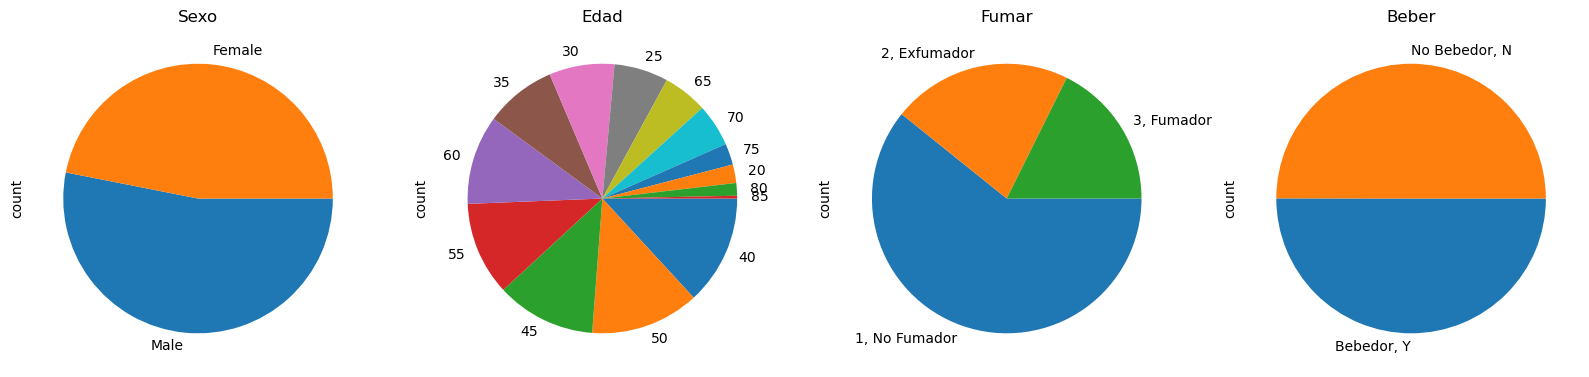

In [3]:
plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)    
df["sex"].value_counts().plot.pie(counterclock=False)
plt.title("Sexo")

plt.subplot(1, 4, 2)    
df["age"].value_counts().plot.pie(counterclock=False)
plt.title("Edad")

plt.subplot(1, 4, 3)   
labels = ["1, No Fumador", "2, Exfumador", "3, Fumador"]
df["SMK_stat_type_cd"].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title("Fumar")

plt.subplot(1, 4, 4)    
labels = ["Bebedor, Y", "No Bebedor, N"]
df["DRK_YN"].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title("Beber")

plt.show()  

In [4]:
def assign_status(row):
    if row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "Y":
        return "Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "N":
        return "Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "Y":
        return "No Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "N":
        return "No Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "Y":
        return "Ha dejado de fumar y Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "N":
        return "Ha dejado de fumar y No Bebe"
    else:
        return "Otro"


df["Smoking_Drinking_Status"] = df.apply(assign_status, axis=1)

df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...            92        17.1              1   
1           1  130  ...           121        15.8              1   
2           1  120  ...           104        15.8              1   
3           1  145  ...           106        17.6              1   
4           1  138  ...           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0        21        35         40                 1       Y   
1               0.9        20        36         27                 3       N   
2               0.9        47        32         68                 1       N   
3               1.1        29        34         18                 1       N   
4               0.8        19        12         25                 1       N   

   Smoking_Drinking_Status  
0           No Fuma y Bebe  
1           Fuma y No Bebe  
2        No Fuma y No Bebe  
3        No Fuma y No Bebe  
4        No Fuma y No Bebe  

[5 rows x 25 columns]

C:\Users\jcndr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


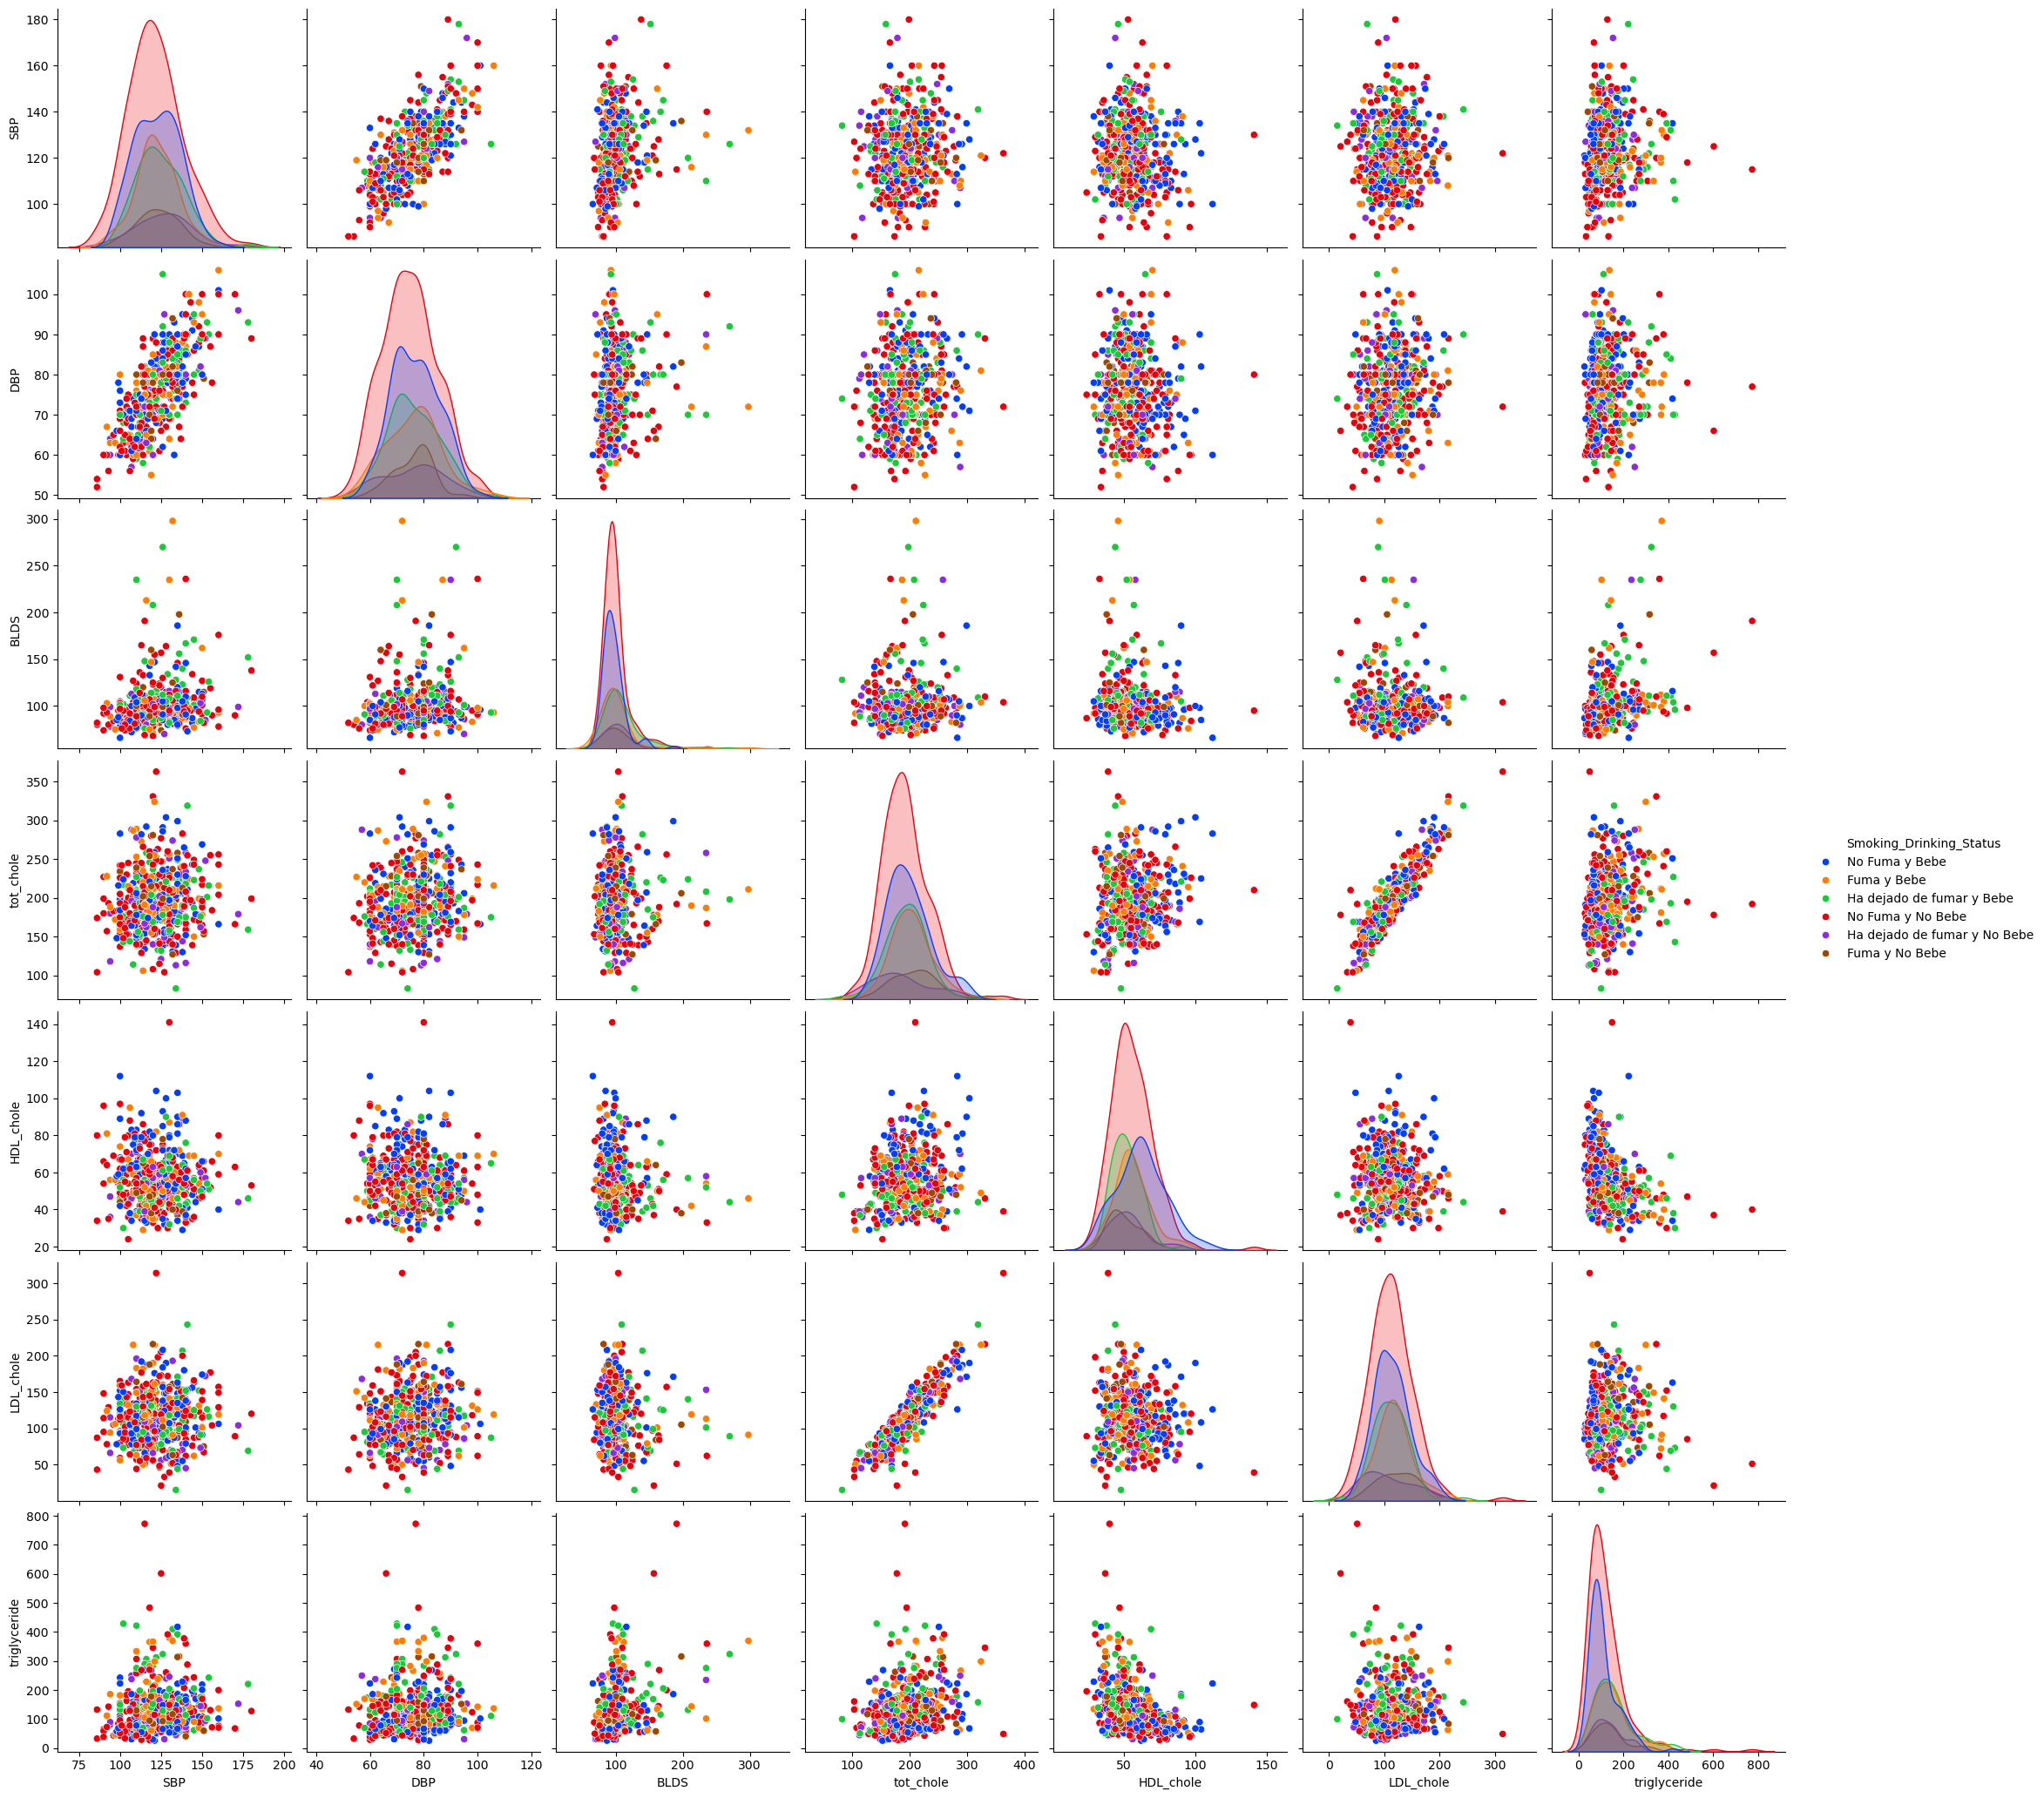

In [6]:
grafico_estados_analiticas = df[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'Smoking_Drinking_Status']].sample(500)
sns.pairplot(grafico_estados_analiticas, hue = "Smoking_Drinking_Status", size = 3, palette = 'bright')

C:\Users\jcndr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


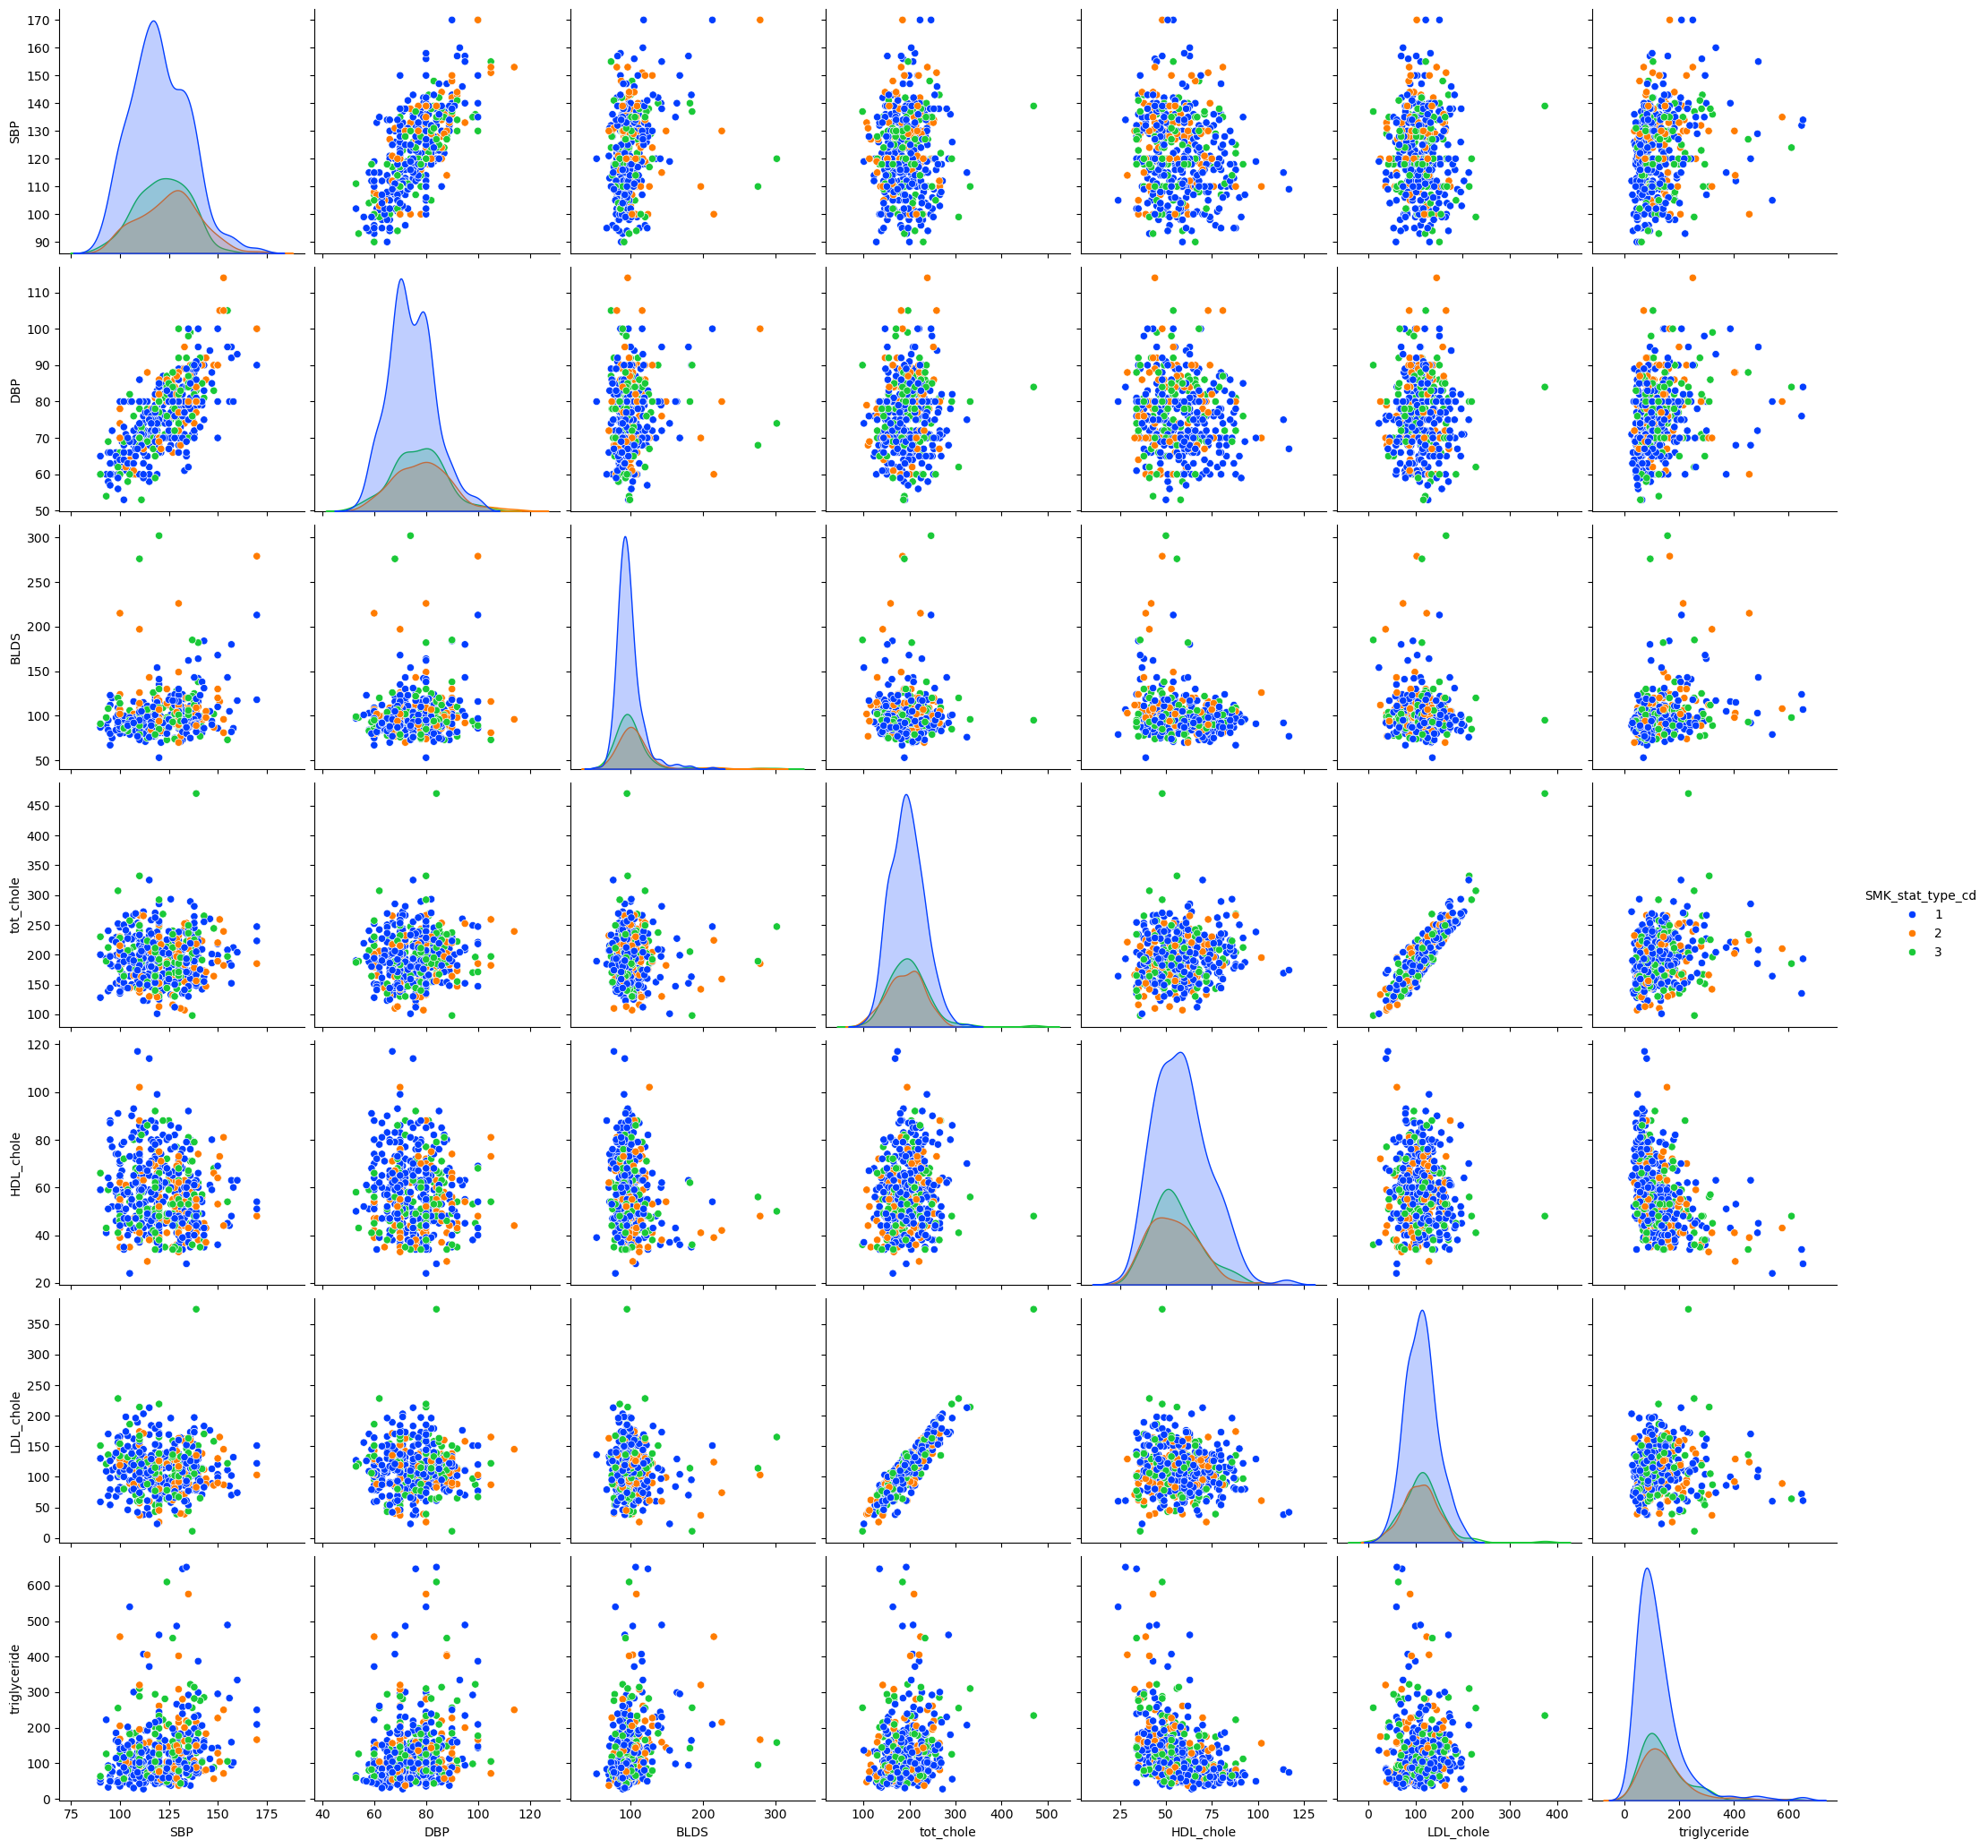

In [7]:
grafico_estados_analiticas = df[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'SMK_stat_type_cd']].sample(500)
sns.pairplot(grafico_estados_analiticas, hue = "SMK_stat_type_cd", size = 3, palette = 'bright')

C:\Users\jcndr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


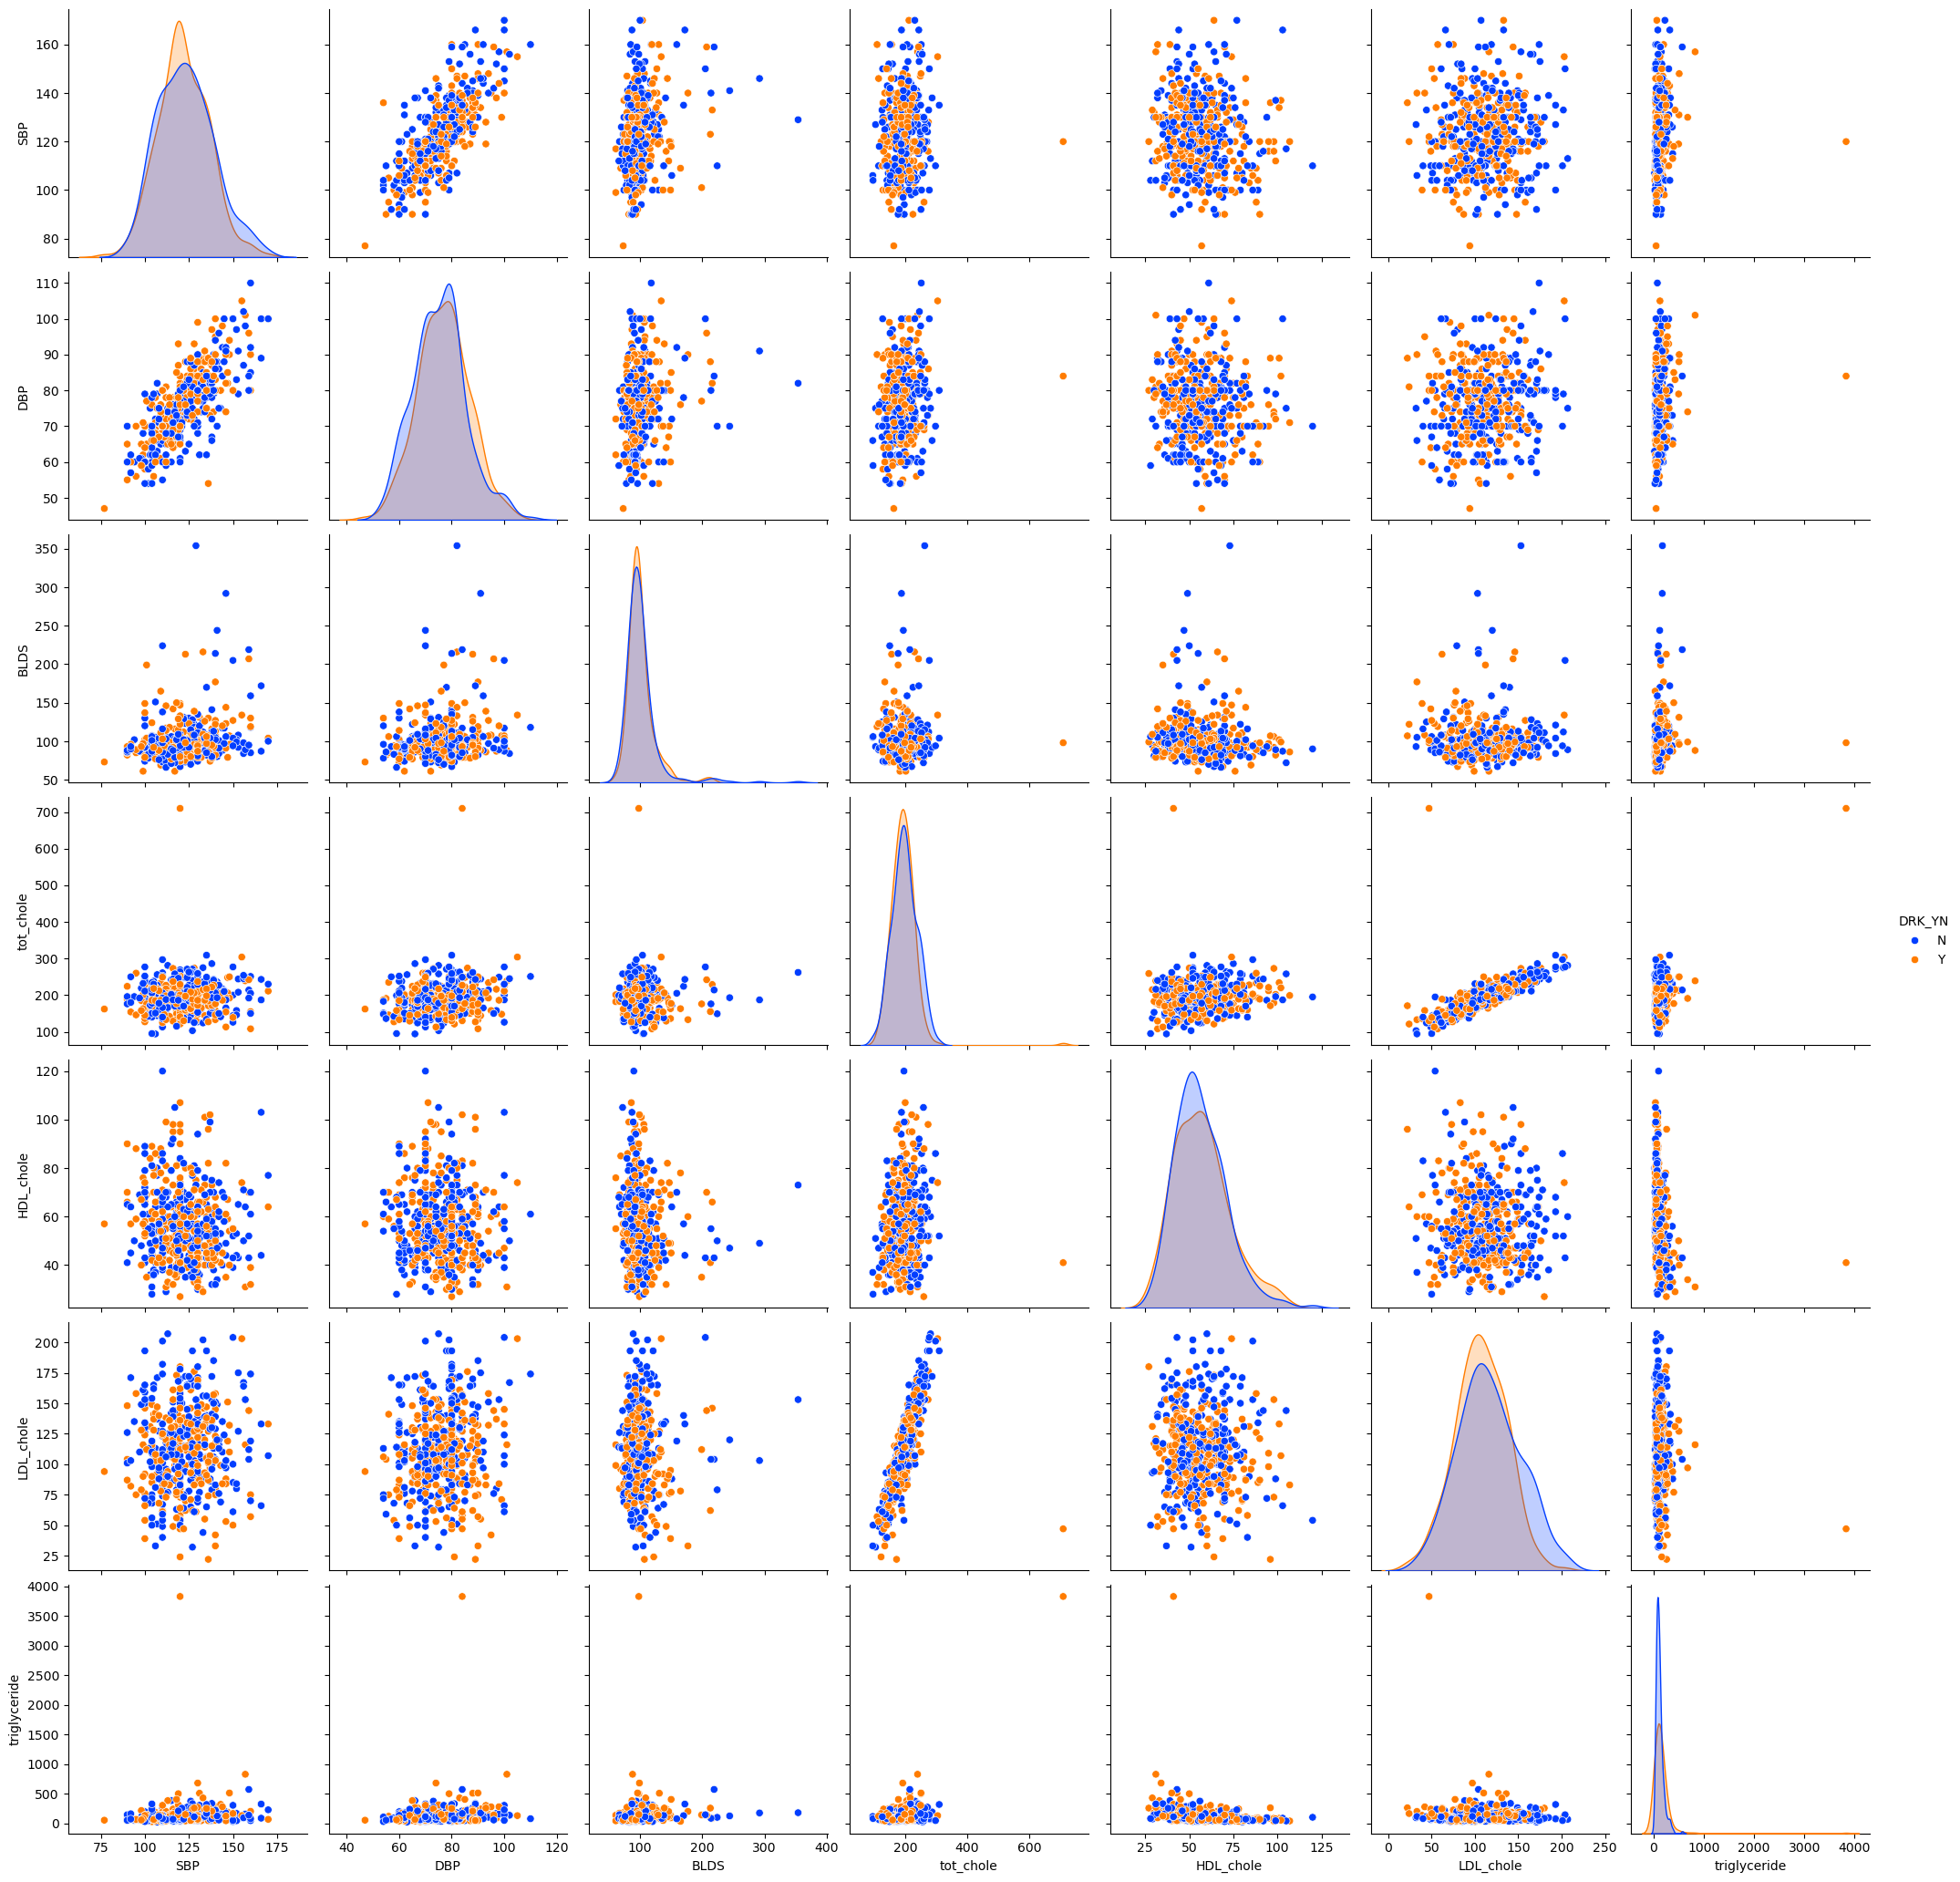

In [8]:
grafico_estados_analiticas = df[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'DRK_YN']].sample(500)
sns.pairplot(grafico_estados_analiticas, hue = "DRK_YN", size = 3, palette = 'bright')

In [20]:
df.shape


(991346, 25)

In [21]:
counts = df['Smoking_Drinking_Status'].value_counts()

In [22]:
counts

Smoking_Drinking_Status
No Fuma y No Bebe               389010
No Fuma y Bebe                  213431
Fuma y Bebe                     161577
Ha dejado de fumar y Bebe       120480
Ha dejado de fumar y No Bebe     54471
Fuma y No Bebe                   52377
Name: count, dtype: int64

In [23]:
389010/991346 * 100

39.24058804897584